<a href="https://colab.research.google.com/github/pasosa-s/pets_classifier/blob/master/pets_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip uninstall torch torchvision -y
!pip install torch==1.4.0 torchvision==0.5.0

     |████████████████████████████████| 753.4MB 12kB/s 
     |████████████████████████████████| 4.0MB 29.4MB/s 


In [8]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [9]:
from fastai.vision import *
from fastai.metrics import error_rate

In [10]:
bs = 64

In [11]:
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [12]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [13]:
path_img = path/'images'
path_anno = path/'annotations'

In [14]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/samoyed_186.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_60.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/beagle_34.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/english_setter_38.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_14.jpg')]

In [15]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [16]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

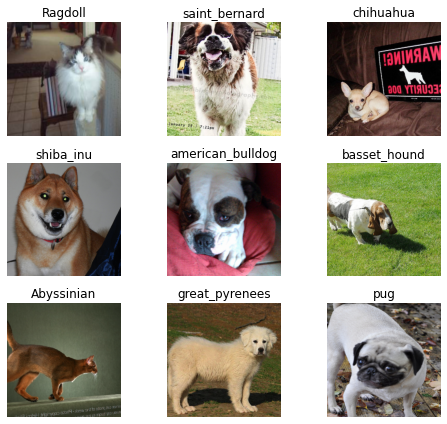

In [17]:
data.show_batch(rows=3, figsize=(7, 6))

In [18]:
print(data.classes)
print(data.c)
print(len(data.classes))

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']
37
37


In [24]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [23]:
learn.model;

In [25]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.368762,0.360027,0.117727,02:02
1,0.619222,0.274403,0.092016,02:04
2,0.393227,0.250204,0.084574,01:49
3,0.295071,0.234675,0.074425,01:46


In [26]:
learn.save('stage-1')

In [29]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

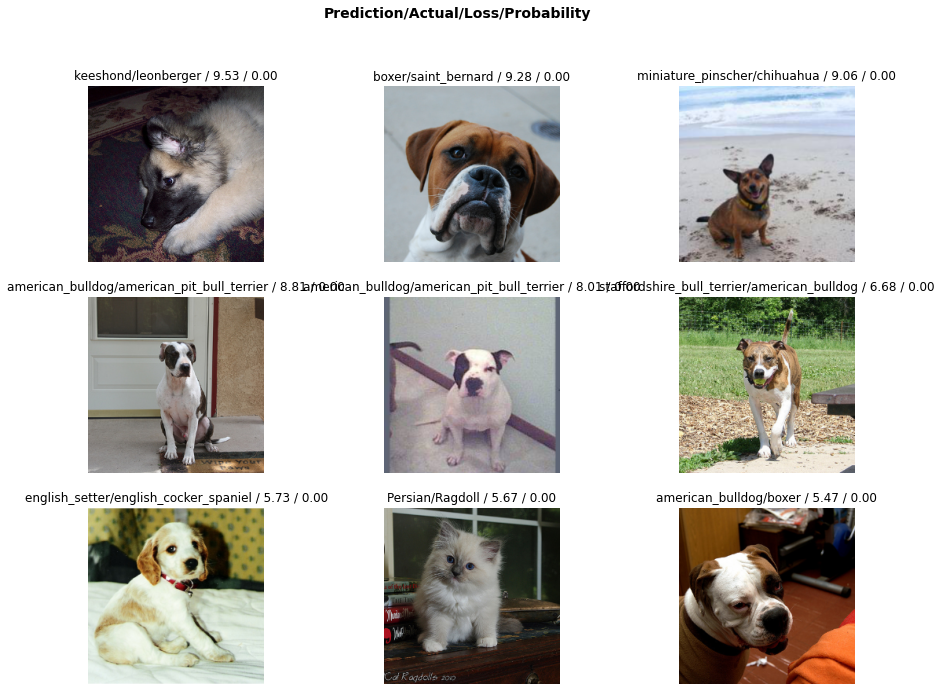

In [30]:
interp.plot_top_losses(9, figsize=(15,11))

In [31]:
doc(interp.plot_top_losses)

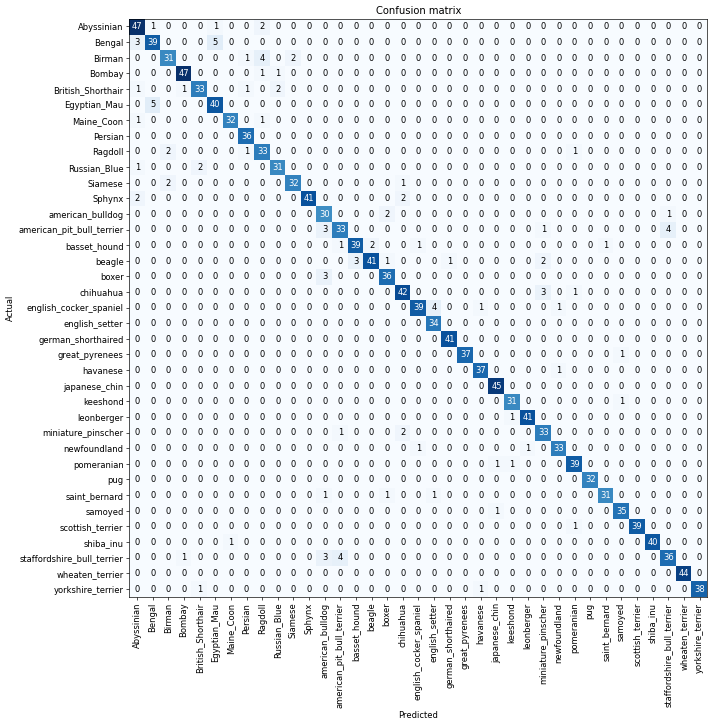

In [32]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [33]:
interp.most_confused(min_val=2)

[('Bengal', 'Egyptian_Mau', 5),
 ('Egyptian_Mau', 'Bengal', 5),
 ('Birman', 'Ragdoll', 4),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 4),
 ('english_cocker_spaniel', 'english_setter', 4),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('Bengal', 'Abyssinian', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('beagle', 'basset_hound', 3),
 ('boxer', 'american_bulldog', 3),
 ('chihuahua', 'miniature_pinscher', 3),
 ('staffordshire_bull_terrier', 'american_bulldog', 3),
 ('Abyssinian', 'Ragdoll', 2),
 ('Birman', 'Siamese', 2),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Ragdoll', 'Birman', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('Siamese', 'Birman', 2),
 ('Sphynx', 'Abyssinian', 2),
 ('Sphynx', 'chihuahua', 2),
 ('american_bulldog', 'boxer', 2),
 ('basset_hound', 'beagle', 2),
 ('beagle', 'miniature_pinscher', 2),
 ('miniature_pinscher', 'chihuahua', 2)]

In [ ]:
learn.load('stage-1')

In [ ]:
learn.unfreeze()

In [37]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


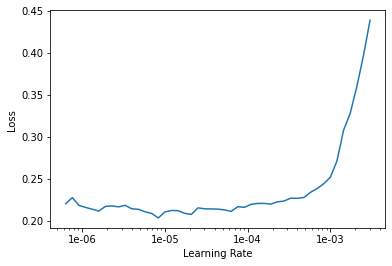

In [39]:
learn.recorder.plot()

In [43]:
learn.load('stage-1');
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.255311,0.229827,0.072395,01:56
1,0.223903,0.215207,0.074425,02:04
2,0.167149,0.203231,0.069012,02:07


In [44]:
learn.save('stage-2')

Now we are going to train our model using resnet50

In [45]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

In [46]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


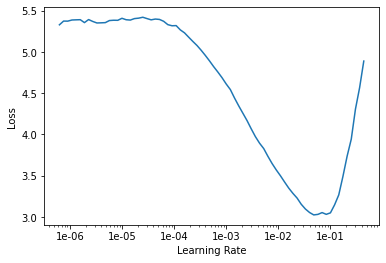

In [47]:
learn.lr_find()
learn.recorder.plot()

In [48]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.724381,0.285967,0.087280,03:21
1,0.539778,0.234135,0.080514,03:16
2,0.433957,0.231996,0.068336,03:18
3,0.387098,0.196609,0.061570,03:18
4,0.248028,0.213038,0.064276,03:21
5,0.173090,0.166568,0.052097,03:23
6,0.129842,0.156052,0.043978,03:19
7,0.110431,0.162398,0.043302,03:19


In [50]:
learn.save('stage-1-50')

In [54]:
learn.load('stage-1-50')
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(5e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.106922,0.159870,0.045332,04:21
1,0.103948,0.145272,0.040595,04:21
2,0.082781,0.142602,0.038566,04:20


In [55]:
learn.save('stage-2-50')

In [57]:
interp = ClassificationInterpretation.from_learner(learn)

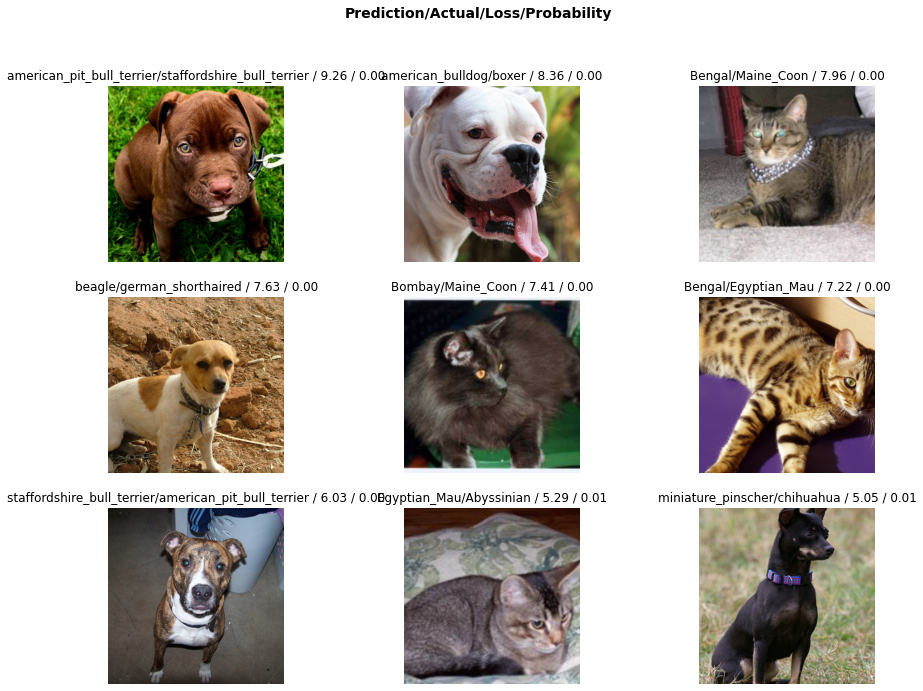

In [58]:
interp.plot_top_losses(9, figsize=(15,11))

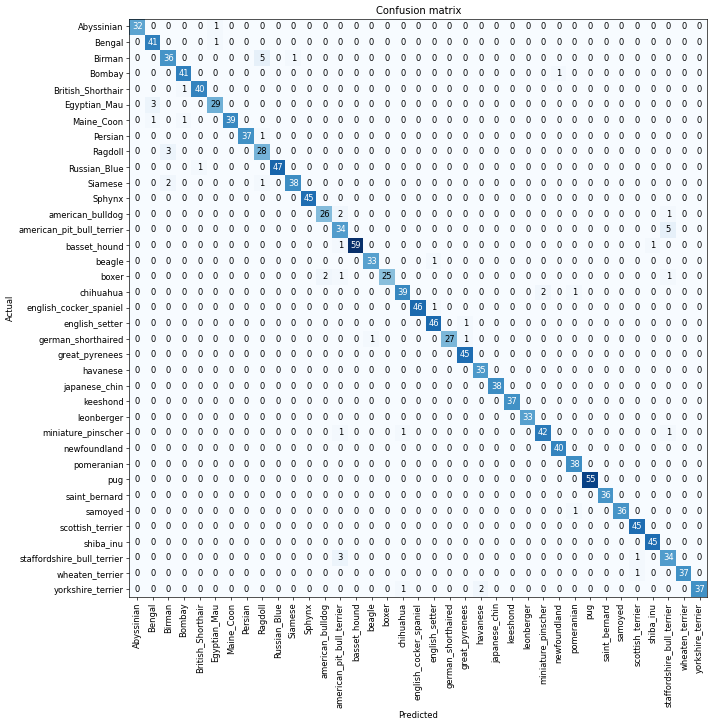

In [59]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [60]:
interp.most_confused(min_val=2)

[('Birman', 'Ragdoll', 5),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Ragdoll', 'Birman', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('Siamese', 'Birman', 2),
 ('american_bulldog', 'american_pit_bull_terrier', 2),
 ('boxer', 'american_bulldog', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('yorkshire_terrier', 'havanese', 2)]